# Perceptron Vs MLP

In this notebook, we'll compare the performance of a perceptron and MLP on a non-linear classification task. We can visually see fow both the models perform in this challenge.

In [1]:
# functioning for generating toy 2D data
import numpy as np # Numpy library is used to work with array. Example: create or modify an array.
def gen_data(n=500):
    x = np.random.randn(n, 2)
    y_ = np.product(x, axis=1) > 0
    y = np.array(y_, dtype=np.int8)
    return(x, y)

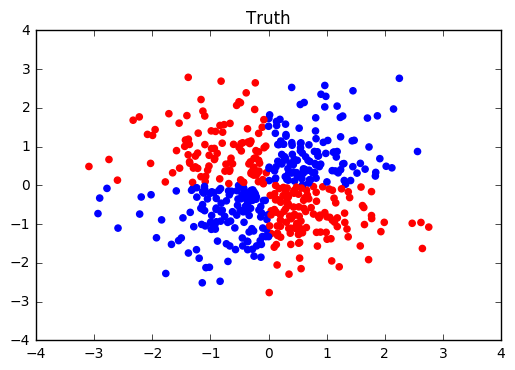

In [2]:
# plt is a visualization module in matplotlib.  
import matplotlib.pyplot as plt

# Generating random samples of two different classes
x_train, y_train = gen_data()

plt.scatter(x_train[:,0], x_train[:,1], color=[['red', 'blue'][x] for x in y_train])
plt.title('Truth')
plt.show()

In [3]:
# keras is a platform for building and training neural networks. 
# Sequential is a container which stores the layers in order. 
# Think of it as a train engine to which you can keep adding train cars. train car in our context will be a layer.
# 'Dense' is a fully connected layer feedforward layer.

import keras
from keras.layers import Dense
from keras .models import Sequential 

Using TensorFlow backend.


In [4]:
# Building a perceptron model
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Training a perceptron model on the 2D data
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
500/500 [==============================] - 0s 518us/step - loss: 0.7489 - acc: 0.4980
Epoch 2/20
500/500 [==============================] - 0s 68us/step - loss: 0.7465 - acc: 0.4980
Epoch 3/20
500/500 [==============================] - 0s 62us/step - loss: 0.7443 - acc: 0.4940
Epoch 4/20
500/500 [==============================] - 0s 31us/step - loss: 0.7419 - acc: 0.4880
Epoch 5/20
500/500 [==============================] - 0s 31us/step - loss: 0.7399 - acc: 0.4840
Epoch 6/20
500/500 [==============================] - 0s 31us/step - loss: 0.7376 - acc: 0.4820
Epoch 7/20
500/500 [==============================] - 0s 31us/step - loss: 0.7356 - acc: 0.4800
Epoch 8/20
500/500 [==============================] - 0s 31us/step - loss: 0.7337 - acc: 0.4760
Epoch 9/20
500/500 [==============================] - 0s 94us/step - loss: 0.7317 - acc: 0.4740
Epoch 10/20
500/500 [==============================] - 0s 31us/step - loss: 0.7298 - acc: 0.4720
Epoch 11/20
500/500 [=================

In [8]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting the class label for the test data
plt.rcParams['figure.figsize'] = 8, 4
preds = model.predict_classes(x_test).reshape(-1,).astype(np.int8)

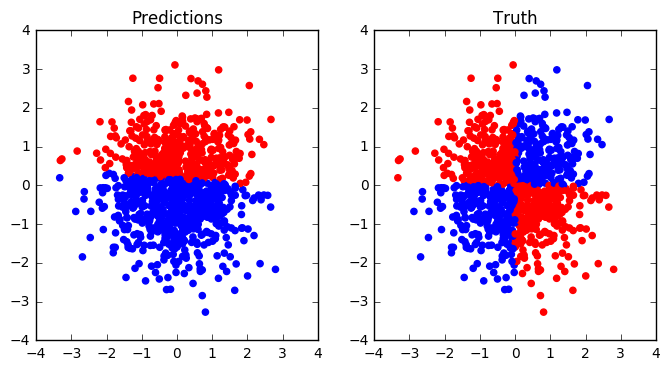

In [12]:
# Ploting the predictions of the perceptron model against ground truth
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()

In [13]:
# 'optimizers' in keras has several variations of gradient decsent that are used for updating weights
from keras import optimizers 

# Building an MLP model with single hidden layer
model2 = Sequential()
model2.add(Dense(8, input_shape=(2,), activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
SGD = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=SGD,
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [14]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Training the MLP on the 2D data
model2.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
 - 0s - loss: 0.7147 - acc: 0.5120
Epoch 2/100
 - 0s - loss: 0.7016 - acc: 0.5000
Epoch 3/100
 - 0s - loss: 0.6924 - acc: 0.5180
Epoch 4/100
 - 0s - loss: 0.6958 - acc: 0.5060
Epoch 5/100
 - 0s - loss: 0.6929 - acc: 0.5340
Epoch 6/100
 - 0s - loss: 0.6945 - acc: 0.5120
Epoch 7/100
 - 0s - loss: 0.6919 - acc: 0.5220
Epoch 8/100
 - 0s - loss: 0.6900 - acc: 0.5180
Epoch 9/100
 - 0s - loss: 0.6923 - acc: 0.5200
Epoch 10/100
 - 0s - loss: 0.6857 - acc: 0.5740
Epoch 11/100
 - 0s - loss: 0.6793 - acc: 0.6140
Epoch 12/100
 - 0s - loss: 0.6742 - acc: 0.5600
Epoch 13/100
 - 0s - loss: 0.6631 - acc: 0.6600
Epoch 14/100
 - 0s - loss: 0.6530 - acc: 0.6660
Epoch 15/100
 - 0s - loss: 0.6363 - acc: 0.6460
Epoch 16/100
 - 0s - loss: 0.6109 - acc: 0.7660
Epoch 17/100
 - 0s - loss: 0.5864 - acc: 0.7660
Epoch 18/100
 - 0s - loss: 0.5644 - acc: 0.7620
Epoch 19/100
 - 0s - loss: 0.5373 - acc: 0.7840
Epoch 20/100
 - 0s - loss: 0.5147 - acc: 0.7940
Epoch 21/100
 - 0s - loss: 0.4938 - acc: 0.7960
E

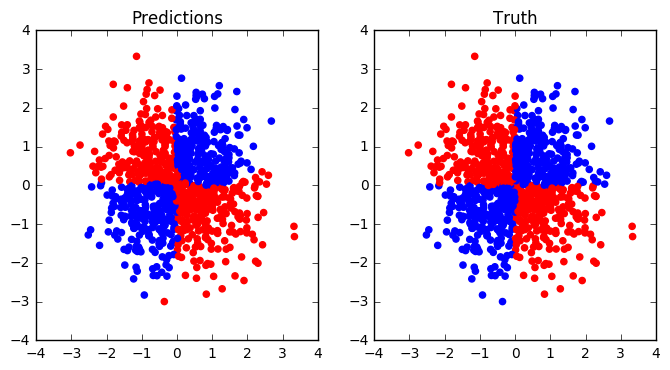

In [16]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting labels using the MLP model
plt.rcParams['figure.figsize'] = 8, 4
preds = model2.predict_classes(x_test).reshape(-1,).astype(np.int8)

# Ploting the predictions against the ground truth labels
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()